# Deflection of LVDT inside UTS Cylinder
---

In [1]:
using Plots, Printf

### Input variables

In [2]:
g = 9.81 # [m/s^2] grav accel
a = 0# 1.7 # [m/s^2] vessel accel, vert component
θ = 35 # [deg] angle of cylinder to vertical
m = 1.99 / 3.66 # [kg/m] LVDT and tube mass per meter
w_a = m * (g + a) * sind(θ) # [N/m] distributed load
OD, ID = 0.0127, 0.0094 # [m] LVDT tube cross-section dimensions
E = 190e9 # [Pa] Young's modulus for stainless steel LVDT tube
l = LinRange(0, 3.5, 100) # [m], range of distances between built-in end and magnet
I = π/64 * (OD^4 - ID^4); # [m^4] LVDT tube cross-section 2nd moment of area
L = 3.5
;

In [3]:
@printf "UDL [N/m]: %.2f" w_a

UDL [N/m]: 3.06

## LVDT overhung lengths
The length of the LVDT tube inside the rod on the other side of the magnet

In [4]:
a = @. L - l

100-element LinRange{Float64, Int64}:
 3.5,3.46465,3.42929,3.39394,3.35859,…,0.106061,0.0707071,0.0353535,0.0

## Deflection of end of overhung
Source of formula: SAISC Red Book, 8th Ed. (2013) - Table 5.19

In [5]:
α = @. a / l
δ_c = @. (w_a * l^4) / (48 * E * I) * ((8 * α^4 + 6 * α^3 - α) - 2 * α^4) * 1000 # mm
;

## Plots

In [6]:
p1 = plot(l, δ_c,
    title="Theoretical Deflection of Overhung End",
    xlabel="distance between built-in end and magnet [m]",
    ylabel="deflection of overhung end [mm]",
    linecolor=:green,
    label="overhung tip deflection");

In [7]:
p1 = plot!([-3.65],
    seriestype=:hline,
    linecolor=:red,
    label="min possible deflection");

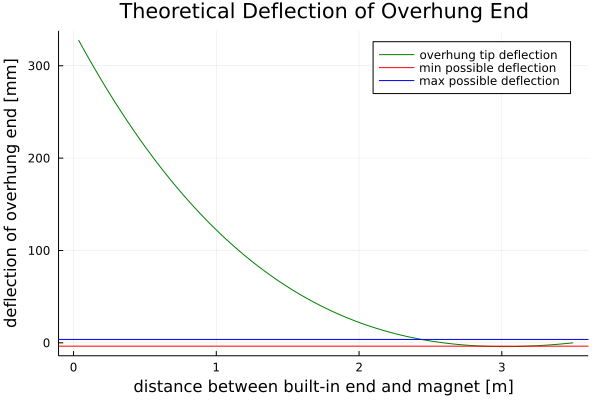

In [8]:
p1 = plot!([+3.65],
    seriestype=:hline,
    linecolor=:blue,
    label="max possible deflection",
    legend=:topright)

In [9]:
high = fill(3.65, size(δ_c))
low = fill(-3.65, size(δ_c))
;

In [10]:
tmp = [min(i,j) for (i,j) in zip(δ_c, high)]
;

In [11]:
y_tip_real = [max(i,j) for (i,j) in zip(tmp, low)]
;

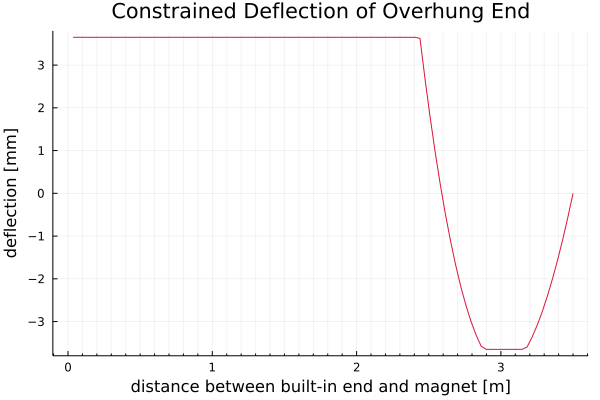

In [12]:
p2 = plot(l, y_tip_real,
    title="Constrained Deflection of Overhung End",
    xlabel="distance between built-in end and magnet [m]",
    ylabel="deflection [mm]",
    linecolor=:crimson,
    label="",
    xminorticks=10,
    xminorgrid=1,
    ylims=(-3.8,3.8))

In [13]:
savefig("DeflectionOverhung.svg")